Schwarzschild Radius (Rs): 295397792.44 km
Data generated successfully: mission_gargantua_sensor_data.csv


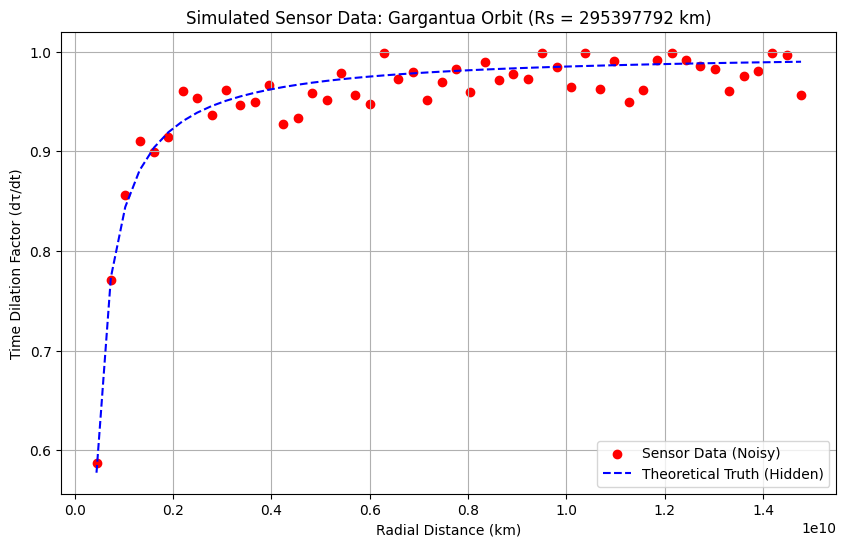

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- CONSTANTS (SI Units) ---
G = 6.67430e-11  # Gravitational constant
M_sun = 1.989e30 # Mass of the sun
M = 100e6 * M_sun # Gargantua: 100 million solar masses
c = 2.998e8      # Speed of light

# Schwarzschild Radius (Event Horizon)
Rs = (2 * G * M) / (c**2)

print(f"Schwarzschild Radius (Rs): {Rs/1000:.2f} km")

# --- DATA GENERATION ---
# We simulate measurements from 1.5*Rs (extremely close) out to 50*Rs
# n_samples = 50 data points
n_samples = 50
r_measurements = np.linspace(1.5 * Rs, 50 * Rs, n_samples)

# Theoretical Truth (Physics)
# Time Dilation Factor = sqrt(1 - Rs/r)
y_true = np.sqrt(1 - (Rs / r_measurements))

# Add Gaussian Noise (Simulating Sensor Error)
np.random.seed(42) # For reproducibility
noise_level = 0.02 # 2% standard deviation noise
noise = np.random.normal(0, noise_level * np.mean(y_true), n_samples)
y_measured = y_true + noise

# Clip values to physically possible bounds (0 to 1) just in case noise pushes them out
y_measured = np.clip(y_measured, 0.001, 0.999)

# --- SAVE TO CSV ---
df = pd.DataFrame({
    'radius_km': r_measurements / 1000, # Convert to km for readability
    'dilation_factor_measured': y_measured
})

csv_filename = 'mission_gargantua_sensor_data.csv'
df.to_csv(csv_filename, index=False)

print(f"Data generated successfully: {csv_filename}")

# Optional: Preview Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['radius_km'], df['dilation_factor_measured'], color='red', label='Sensor Data (Noisy)')
plt.plot(df['radius_km'], np.sqrt(1 - (Rs/1000)/df['radius_km']), 'b--', label='Theoretical Truth (Hidden)')
plt.title(f"Simulated Sensor Data: Gargantua Orbit (Rs = {Rs/1000:.0f} km)")
plt.xlabel("Radial Distance (km)")
plt.ylabel("Time Dilation Factor (dτ/dt)")
plt.legend()
plt.grid(True)
plt.show()